# Machine Learning - Mini Project 1 - Alex Montoya Franco

## Banking Campaign Output Prediction

## Data Processing

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
data = pd.read_csv("bank-additional-full.csv", delimiter=';')

In [ ]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
data.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

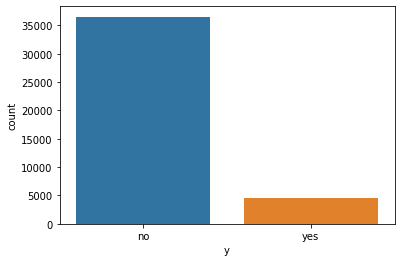

In [ ]:
sns.countplot(x = data['y'])

In [ ]:
data.y.unique()

array(['no', 'yes'], dtype=object)

In [ ]:
data['y'] = data['y'].map({'yes' : 1, 'no' : 0})

In [ ]:
data.y.unique()

array([0, 1])

In [ ]:
numerical_data = data.select_dtypes(exclude='object')
categorical_data = data.select_dtypes(include='object')

### Numerical Features

In [ ]:
numerical_data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0


In [ ]:
numerical_data.drop(['duration'], axis=1, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


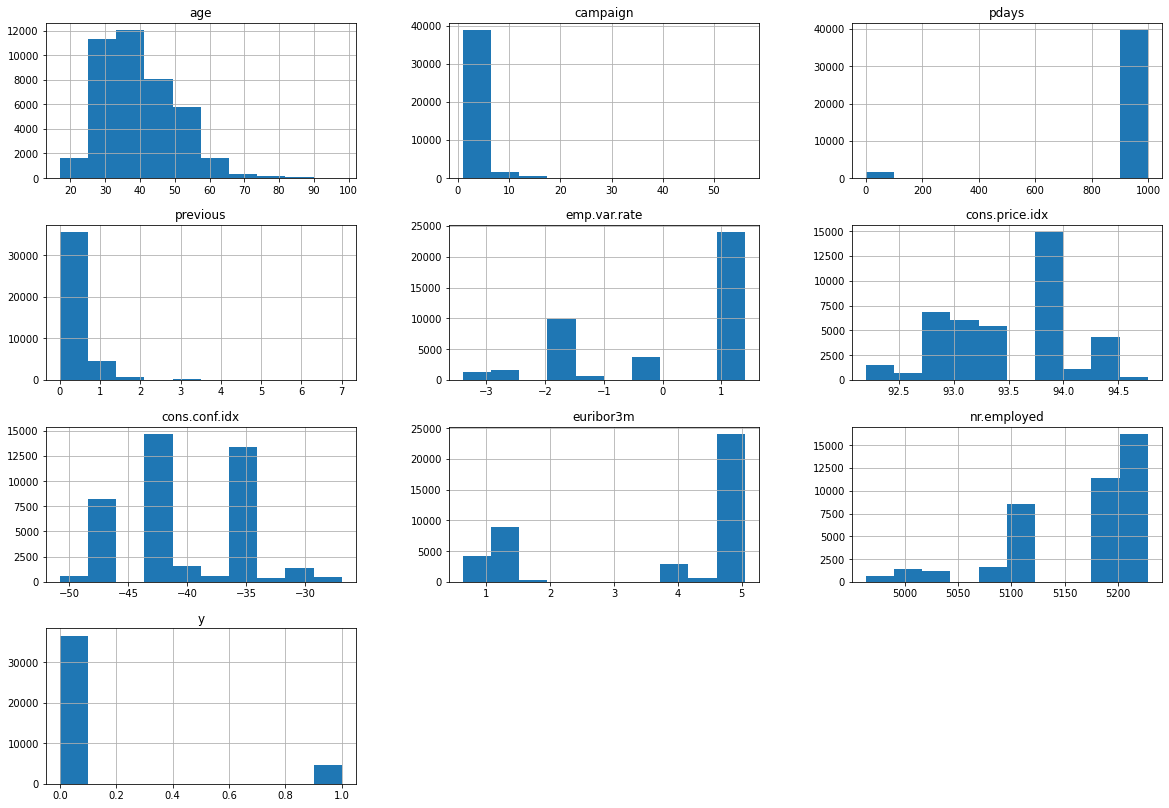

In [ ]:
_ = numerical_data.hist(figsize=(20, 14))

In [ ]:
from matplotlib import pyplot as plt

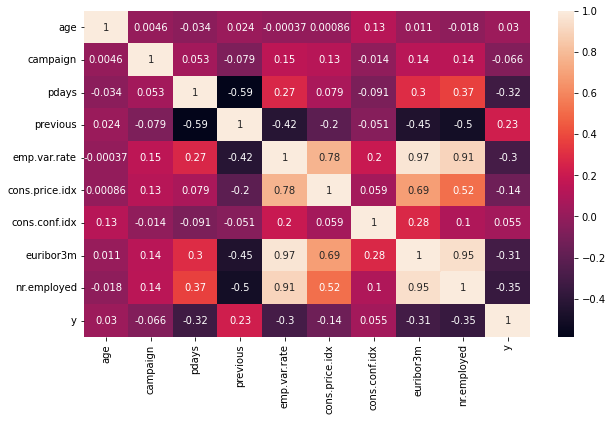

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.heatmap(numerical_data.corr(), annot=True)

In [ ]:
import numpy as np

In [ ]:
cor_matrix = numerical_data.corr().abs()

In [ ]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))

In [ ]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(to_drop)

['euribor3m']


In [ ]:
numerical_data = numerical_data.drop(to_drop, axis=1)

In [ ]:
numerical_data.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,y
0,56,1,999,0,1.1,93.994,-36.4,5191.0,0
1,57,1,999,0,1.1,93.994,-36.4,5191.0,0
2,37,1,999,0,1.1,93.994,-36.4,5191.0,0
3,40,1,999,0,1.1,93.994,-36.4,5191.0,0
4,56,1,999,0,1.1,93.994,-36.4,5191.0,0


In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
var_thr = VarianceThreshold(threshold = 0.25)
var_thr.fit(numerical_data)

var_thr.get_support()

array([ True,  True,  True, False,  True,  True,  True,  True, False])

- True: High Variance
- False: Low Variance

In [ ]:
concol = [column for column in numerical_data.columns 
          if column not in numerical_data.columns[var_thr.get_support()]]

for features in concol:
    print(features)

previous
y


In [ ]:
numerical_data.previous.value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

In [ ]:
numerical_data.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,y
0,56,1,999,0,1.1,93.994,-36.4,5191.0,0
1,57,1,999,0,1.1,93.994,-36.4,5191.0,0
2,37,1,999,0,1.1,93.994,-36.4,5191.0,0
3,40,1,999,0,1.1,93.994,-36.4,5191.0,0
4,56,1,999,0,1.1,93.994,-36.4,5191.0,0


In [ ]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
numerical_X = sc.fit_transform(numerical_data.drop('y', axis=1))

In [ ]:
numerical_X_df = pd.DataFrame(numerical_X, columns = numerical_data.drop('y', axis=1).columns)
numerical_X_df.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed
0,1.533034,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.33168
1,1.628993,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.33168
2,-0.290186,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.33168
3,-0.002309,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.33168
4,1.533034,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.33168


In [ ]:
y = numerical_data['y']

### Categorical Features

In [ ]:
categorical_data.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


In [ ]:
categorical_data.describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563


In [ ]:
def visualize_value_counts(column):
  categorical_data[column].value_counts().plot(kind='bar')

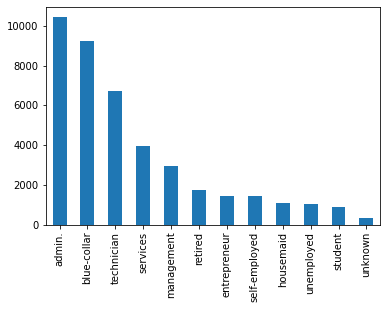

In [ ]:
visualize_value_counts("job")

Encoding Categorical Data (One-hot encoding)

In [ ]:
categorical_data = pd.get_dummies(categorical_data, columns=["job"], prefix="job")
categorical_data = pd.get_dummies(categorical_data, columns=["marital"], prefix="marital")
categorical_data = pd.get_dummies(categorical_data, columns=["education"], prefix="education")
categorical_data = pd.get_dummies(categorical_data, columns=["default"], prefix="default")
categorical_data = pd.get_dummies(categorical_data, columns=["housing"], prefix="housing")
categorical_data = pd.get_dummies(categorical_data, columns=["loan"], prefix="loan")
categorical_data = pd.get_dummies(categorical_data, columns=["contact"], prefix="contact")
categorical_data = pd.get_dummies(categorical_data, columns=["month"], prefix="month")
categorical_data = pd.get_dummies(categorical_data, columns=["day_of_week"], prefix="day_of_week")
categorical_data = pd.get_dummies(categorical_data, columns=["poutcome"], prefix="poutcome")

In [ ]:
categorical_data.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


### Combining Normalized numerical features with Encoded categorical features

In [ ]:
numerical_X_df.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed
0,1.533034,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.33168
1,1.628993,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.33168
2,-0.290186,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.33168
3,-0.002309,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.33168
4,1.533034,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.33168


In [ ]:
categorical_data.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
X = pd.concat([numerical_X_df, categorical_data], axis=1)

In [ ]:
X.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,job_admin.,job_blue-collar,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,1.533034,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.33168,0,0,...,0,0,0,1,0,0,0,0,1,0
1,1.628993,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.33168,0,0,...,0,0,0,1,0,0,0,0,1,0
2,-0.290186,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.33168,0,0,...,0,0,0,1,0,0,0,0,1,0
3,-0.002309,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.33168,1,0,...,0,0,0,1,0,0,0,0,1,0
4,1.533034,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.33168,0,0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

## Modelling - Neural Network

In [ ]:
print('X:',np.shape(X))
print('y:',np.shape(y))

X: (41188, 61)
y: (41188,)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [ ]:
print('X train:',np.shape(X_train))
print('X test:',np.shape(X_test))

X train: (32950, 61)
X test: (8238, 61)


In [ ]:
from keras import models
from keras import layers

In [ ]:
network = models.Sequential()

In [ ]:
# input layer
network.add(layers.Dense(units=16, activation="relu", input_dim=len(X_train.columns)))

# hidden layer
network.add(layers.Dense(units=16, activation="relu"))

# output layer
network.add(layers.Dense(units=1, activation="sigmoid"))

In [ ]:
network.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [ ]:
history = network.fit(X_train, 
                      y_train, 
                      epochs=10,
                      verbose=1,
                      batch_size=100,
                      validation_data=(X_test, y_test))

Epoch 1/10
330/330 [==============================] - 2s 3ms/step - loss: 0.3154 - accuracy: 0.8859 - val_loss: 0.2894 - val_accuracy: 0.8973
Epoch 2/10
330/330 [==============================] - 1s 2ms/step - loss: 0.2775 - accuracy: 0.8999 - val_loss: 0.2855 - val_accuracy: 0.8969
Epoch 3/10
330/330 [==============================] - 1s 2ms/step - loss: 0.2750 - accuracy: 0.9006 - val_loss: 0.2862 - val_accuracy: 0.8984
Epoch 4/10
330/330 [==============================] - 1s 2ms/step - loss: 0.2739 - accuracy: 0.9010 - val_loss: 0.2846 - val_accuracy: 0.8982
Epoch 5/10
330/330 [==============================] - 1s 2ms/step - loss: 0.2730 - accuracy: 0.9019 - val_loss: 0.2846 - val_accuracy: 0.8980
Epoch 6/10
330/330 [==============================] - 1s 2ms/step - loss: 0.2723 - accuracy: 0.9021 - val_loss: 0.2846 - val_accuracy: 0.8973
Epoch 7/10
330/330 [==============================] - 1s 2ms/step - loss: 0.2716 - accuracy: 0.9024 - val_loss: 0.2841 - val_accuracy: 0.8969
Epoch 

In [ ]:
predicted_target = network.predict(X_test)

258/258 [==============================] - 0s 1ms/step


In [ ]:
predicted_target

array([[0.10962767],
       [0.00996328],
       [0.06339897],
       ...,
       [0.05042907],
       [0.08575673],
       [0.02619383]], dtype=float32)

In [ ]:
# Probability of observation is class 1
predicted_target[0]

array([0.10962767], dtype=float32)

Visualizing Loss

In [ ]:
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]
epoch_count = range(1, len(training_loss) + 1)

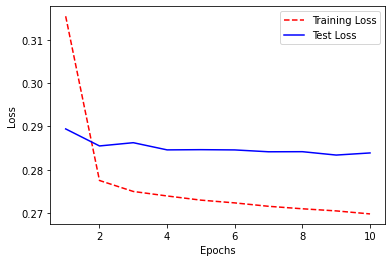

In [ ]:
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

Visualizing Accuracy

In [ ]:
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]

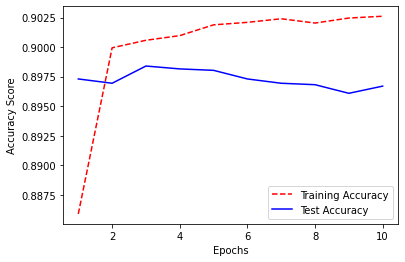

In [ ]:
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy Score")
plt.show()

Reduce overfitting with Early Stopping

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
network_2 = models.Sequential()

network_2.add(layers.Dense(units=16, activation="relu", input_dim=len(X_train.columns)))

network_2.add(layers.Dense(units=16, activation="relu"))

network_2.add(layers.Dense(units=1, activation="sigmoid"))

network_2.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [ ]:
callback = EarlyStopping(monitor="val_loss", patience=2)

In [ ]:
history_2 = network_2.fit(X_train, 
                      y_train, 
                      epochs=10,
                      callbacks=callback,
                      verbose=1,
                      batch_size=100,
                      validation_data=(X_test, y_test))

Epoch 1/10
330/330 [==============================] - 1s 3ms/step - loss: 0.3123 - accuracy: 0.8928 - val_loss: 0.2896 - val_accuracy: 0.8960
Epoch 2/10
330/330 [==============================] - 1s 2ms/step - loss: 0.2774 - accuracy: 0.9004 - val_loss: 0.2870 - val_accuracy: 0.8945
Epoch 3/10
330/330 [==============================] - 1s 2ms/step - loss: 0.2745 - accuracy: 0.9007 - val_loss: 0.2863 - val_accuracy: 0.8950
Epoch 4/10
330/330 [==============================] - 1s 2ms/step - loss: 0.2730 - accuracy: 0.9018 - val_loss: 0.2852 - val_accuracy: 0.8961
Epoch 5/10
330/330 [==============================] - 1s 2ms/step - loss: 0.2721 - accuracy: 0.9021 - val_loss: 0.2850 - val_accuracy: 0.8962
Epoch 6/10
330/330 [==============================] - 1s 2ms/step - loss: 0.2713 - accuracy: 0.9024 - val_loss: 0.2859 - val_accuracy: 0.8962
Epoch 7/10
330/330 [==============================] - 1s 2ms/step - loss: 0.2706 - accuracy: 0.9025 - val_loss: 0.2844 - val_accuracy: 0.8968
Epoch 

Visualizing Network Architecture

In [ ]:
from IPython.display import SVG

In [ ]:
from keras.utils.vis_utils import model_to_dot

In [ ]:
from keras.utils import plot_model

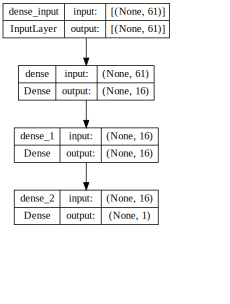

In [ ]:
SVG(model_to_dot(network, show_shapes=True).create(prog="dot", format="svg"))